# Principal Components Analyisis

This notebook presents the data preprocessing and the principal components analysis for a dataset.\
The notebook is divided into three sections. In the first section, packages were loaded, and functions were defined. The following two sections present the EDA and PCA for respectively. 

## 0. Loading packages and data. Defining functions

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler  
from sklearn.preprocessing import StandardScaler
from scipy import stats

In [2]:
#visualizing outliers for area
#due to salary scale is bigger, we use different charts 
def plot_stats(i, j):
    """Shows Boxplots 
       Arg
       i, j (int): range of columns of a dataframe to visualize its boxplots
    """
    data_1.iloc[:, i:j].plot(
        kind='box',             #plot type
        subplots=True,          #create multiple subplots
        sharey=False,           # It works along with sbuplots=True to isolate the y-axis for each column. 
        figsize=(10, 6)         #figure size
    )
    # increase spacing between subplots
    plt.subplots_adjust(wspace=0.5) 
    plt.show()

__Loading dataset__

In [3]:
#loading data 
data_salary = pd.read_csv("Salaries1.csv")
data_seasons = pd.read_csv("Seasons_Stats.csv")

We have two files with data related to NBA. The first one is about salaries  and the second one about statistics of NBA players. 

We are going to join the files. But in Seasons_Stats.csv the information is presented for different years, and also a player could play for different team. While in Salaries1.csv the player plays for a specific team and the salary corresponds to that work, then we need to consider those two variables 

In [4]:
#Merging both files by player and team
data=data_salary.merge(data_seasons, left_on= ['NAME', 'TEAM'], right_on= ['Player', 'Tm'], how = 'inner')

## 1. Cleaning and transformations

### 1.1. Getting familiar with data (Data information)

In [5]:
print('Data columns\n', data.columns, '\n\nThe shape of the DataFrame is:\n', data.shape)
#It is necessary to drop two of these columns because they have the same information

Data columns
 Index(['RK', 'NAME', 'TEAM', 'SALARY         ', 'Team Rank', 'Unnamed: 0',
       'Year', 'Player', 'Pos', 'Age', 'Tm', 'G', 'GS', 'MP', 'PER', 'TS%',
       '3PAr', 'FTr', 'ORB%', 'DRB%', 'TRB%', 'AST%', 'STL%', 'BLK%', 'TOV%',
       'USG%', 'blanl', 'OWS', 'DWS', 'WS', 'WS/48', 'blank2', 'OBPM', 'DBPM',
       'BPM', 'VORP', 'FG', 'FGA', 'FG%', '3P', '3PA', '3P%', '2P', '2PA',
       '2P%', 'eFG%', 'FT', 'FTA', 'FT%', 'ORB', 'DRB', 'TRB', 'AST', 'STL',
       'BLK', 'TOV', 'PF', 'PTS'],
      dtype='object') 

The shape of the DataFrame is:
 (1184, 58)


Here we can see that the column's name SALARY has several blank spaces, it would be changed later. Also, just for format, we are going to change the last column\
Also, several column's names have "%" symbol I do not know if this could create some kind of conflict when invoque them. For now, we keep them.

In [6]:
print('\n#############    DATA HEAD   #############\n', data.head())
print('\n#############    DATA SEGMENT    #############\n', data.iloc[200:220, :])


#############    DATA HEAD   #############
    RK          NAME TEAM  SALARY           Team Rank  Unnamed: 0    Year  \
0   1  LeBron James  CLE       30963450.0          1       16746  2004.0   
1   1  LeBron James  CLE       30963450.0          1       17344  2005.0   
2   1  LeBron James  CLE       30963450.0          1       17918  2006.0   
3   1  LeBron James  CLE       30963450.0          1       18460  2007.0   
4   1  LeBron James  CLE       30963450.0          1       19017  2008.0   

         Player Pos   Age  ...    FT%    ORB    DRB    TRB    AST    STL  \
0  LeBron James  SG  19.0  ...  0.754   99.0  333.0  432.0  465.0  130.0   
1  LeBron James  SF  20.0  ...  0.750  111.0  477.0  588.0  577.0  177.0   
2  LeBron James  SF  21.0  ...  0.738   75.0  481.0  556.0  521.0  123.0   
3  LeBron James  SF  22.0  ...  0.698   83.0  443.0  526.0  470.0  125.0   
4  LeBron James  SF  23.0  ...  0.712  133.0  459.0  592.0  539.0  138.0   

    BLK    TOV     PF     PTS  
0  58.0  

* We can see that "RK" and "Unnamed: 0" correspond to an index, then we are able to delete this column since it does not contribute to any further processing or analysis.\
* "Player", "Pos", and "Tm" are strings. "Player" might not contribute to any analysis and we could drop it, but, for now lets continue with this column. "Pos" and "Tm" could be a categorical varaible then.
* Also, there are several features with missing values
* Some names have astherics

In [7]:
type(data.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1184 entries, 0 to 1183
Data columns (total 58 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RK               1184 non-null   int64  
 1   NAME             1184 non-null   object 
 2   TEAM             1184 non-null   object 
 3   SALARY           1184 non-null   float64
 4   Team Rank        1184 non-null   int64  
 5   Unnamed: 0       1184 non-null   int64  
 6   Year             1184 non-null   float64
 7   Player           1184 non-null   object 
 8   Pos              1184 non-null   object 
 9   Age              1184 non-null   float64
 10  Tm               1184 non-null   object 
 11  G                1184 non-null   float64
 12  GS               1184 non-null   float64
 13  MP               1184 non-null   float64
 14  PER              1184 non-null   float64
 15  TS%              1182 non-null   float64
 16  3PAr             1182 non-null   float64
 17  FTr           

NoneType

* Since "blanl" and "blank2" have no records, we can drop both of them because we neither are able to impute their values or have an algorith to compute them\
* Several columns have missing values, most of thes column lack 2 or 4 values and FT% lacks 23 values\
* "YEAR" and "Age" are floats but should be integers, if the decimal in all the cases is zero.\

In [8]:
#related statistics about the numerical columns
data.describe()

,RK,SALARY,Team Rank,Unnamed: 0,Year,Age,G,GS,MP,PER,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
count,1184.000000,1.184000e+03,1184.000000,1184.000000,1184.000000,1184.000000,1184.000000,1184.000000,1184.000000,1184.000000,...,1161.000000,1184.000000,1184.000000,1184.000000,1184.000000,1184.000000,1184.000000,1184.000000,1184.000000,1184.000000
mean,187.099662,8.474410e+06,6.853885,23248.288851,2015.090372,25.640203,58.342905,33.091216,1481.088682,14.626774,...,0.747232,65.380068,202.603885,267.983953,143.983108,50.179899,29.414696,86.828547,120.780405,670.599662
std,135.672210,7.735824e+06,4.597375,1743.000475,2.954906,4.227344,22.789098,31.074586,869.333400,5.555472,...,0.127162,66.729599,156.083477,213.500133,151.357246,38.014019,33.551960,68.201768,67.774581,520.141438
min,1.000000,5.767000e+03,1.000000,8825.000000,1988.000000,19.000000,1.000000,0.000000,1.000000,-17.600000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,66.000000,2.121288e+06,3.000000,22889.250000,2015.000000,22.000000,43.000000,2.000000,727.250000,11.275000,...,0.692000,19.000000,84.750000,111.750000,39.000000,20.000000,7.000000,35.000000,69.750000,261.750000
50%,171.000000,5.505618e+06,6.000000,23872.000000,2016.000000,25.000000,66.000000,24.000000,1519.000000,14.350000,...,0.768000,44.000000,175.000000,225.000000,95.500000,43.000000,19.000000,73.000000,125.000000,559.500000
75%,287.000000,1.355000e+07,10.000000,24326.500000,2017.000000,28.000000,77.000000,66.000000,2198.250000,17.725000,...,0.827000,91.250000,282.000000,366.250000,193.000000,71.250000,38.000000,123.000000,171.000000,981.750000
max,486.000000,3.096345e+07,21.000000,24690.000000,2017.000000,40.000000,82.000000,82.000000,3388.000000,32.000000,...,1.000000,440.000000,829.000000,1226.000000,906.000000,191.000000,269.000000,464.000000,332.000000,2558.000000


Several features are skewed distributed
____________________________

Unique values

In [9]:
#checking for unique values
data.nunique()

RK                  486
NAME                486
TEAM                 30
SALARY              332
Team Rank            21
Unnamed: 0         1184
Year                 21
Player              486
Pos                   5
Age                  22
Tm                   30
G                    82
GS                   83
MP                  985
PER                 247
TS%                 269
3PAr                508
FTr                 467
ORB%                163
DRB%                255
TRB%                203
AST%                342
STL%                 47
BLK%                 80
TOV%                195
USG%                246
blanl                 0
OWS                 129
DWS                  61
WS                  154
WS/48               299
blank2                0
OBPM                173
DBPM                111
BPM                 193
VORP                 90
FG                  526
FGA                 772
FG%                 299
3P                  198
3PA                 391
3P%             

Here we can see that "Year" and "Player" have 21 and 82 unique values then we can suppose that maybe some players are repeated under different years and games.

In [10]:
#repeated players
data.Player.value_counts()

Dirk Nowitzki       19
Tony Parker         16
Manu Ginobili       15
Udonis Haslem       14
LeBron James        10
                    ..
Alex Poythress       1
Ben Bentil           1
Anthony Tolliver     1
Raymond Felton       1
James Johnson        1
Name: Player, Length: 486, dtype: int64

In [11]:
#To show that we can create groups by Player
data.groupby(["Player"]).get_group(("Dirk Nowitzki")).head(3)

,RK,NAME,TEAM,SALARY,Team Rank,Unnamed: 0,Year,Player,Pos,Age,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
44,8,Dirk Nowitzki,DAL,25000000.0,1,14289,1999.0,Dirk Nowitzki,PF,20.0,...,0.773,41.0,121.0,162.0,47.0,29.0,27.0,73.0,105.0,385.0
45,8,Dirk Nowitzki,DAL,25000000.0,1,14804,2000.0,Dirk Nowitzki,PF,21.0,...,0.830,102.0,430.0,532.0,203.0,63.0,68.0,141.0,256.0,1435.0
46,8,Dirk Nowitzki,DAL,25000000.0,1,15328,2001.0,Dirk Nowitzki,PF,22.0,...,0.838,119.0,635.0,754.0,173.0,79.0,101.0,156.0,245.0,1784.0


With the above count  and the groups we can verify the previous assumption about players
__________

In [12]:
#repeated years
data.Year.value_counts()

2017.0    486
2016.0    253
2015.0    156
2014.0     84
2013.0     54
2012.0     38
2011.0     29
2010.0     21
2009.0     13
2008.0      9
2007.0      9
2006.0      8
2005.0      8
2004.0      6
2003.0      3
2002.0      2
1989.0      1
2001.0      1
1999.0      1
1988.0      1
2000.0      1
Name: Year, dtype: int64

From the list showed above we can see:
* one player has played from 2000 to 2017.
* these players usually play for the same team (remember that our merge considered the team as a matching value)
* all of our players on the Salary1 file played on 2017

If we wanted to value how much we need to pay to a player, then we will use data for their performance on the year of interest. On another hand, by doing a salary research for some players I found that the salary values correspond to 2017 season. Then we are going to drop the rest of the years to rate these players.

### 1.2. Changing data 

__Changin name column__ \
We saw that the column's name for salary has several blank spaces, it maybe could be repeated in its elements. For now lets take out this spaces to avoid future errors at calling the column. Also, just for format, we are going to change the last column

In [13]:
data.rename(columns = {'SALARY         ':'Salary', 'Team Rank': 'Team_Rank'}, inplace = True)
                                 #inplace=True ignores to copy into a new dataframe

In [56]:
#Verifying if Year and Age should be an integer
#for i in data_1['Age'].loc[data_1['Age'].notna()]:
 #       if i%1 != 0:
  #          print(i)
#Because there was no any decimal contribution, now, we can convert this two columns to integers
cols = ['Year', 'Age']
data[cols] = data[cols].fillna(0).astype({"Year":"int","Age":"int"})   #fillna(0) fill NaN values with zero
#Now we restore null values that in the last lines were filled by 0
data[cols] = data[cols].replace(0, None)  #Replacing zero by None, in this case it seems that in a integer column is not 
                                              #possible to replace by NaN

__Drop columns or rows__

***************************   __data_1__ after dropping columns and rows  ***************************

In [60]:
#Dropping columns, as we saw before RK and Unnamed are indexes, NAME and TEAM repeat information given by Player and Tm and 
#blanl and blank2 have no records
dtemp = data.drop(['RK', 'NAME', 'TEAM', 'Unnamed: 0', 'blanl', 'blank2'], axis=1)
print('The new size of the dataset is {}'.format(dtemp.shape))
dtemp.head(2)

The new size of the dataset is (1184, 52)


,Salary,Team_Rank,Year,Player,Pos,Age,Tm,G,GS,MP,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,30963450.0,1,2004,LeBron James,SG,19,CLE,79.0,79.0,3122.0,...,0.754,99.0,333.0,432.0,465.0,130.0,58.0,273.0,149.0,1654.0
1,30963450.0,1,2005,LeBron James,SF,20,CLE,80.0,80.0,3388.0,...,0.750,111.0,477.0,588.0,577.0,177.0,52.0,262.0,146.0,2175.0


In [16]:
#Droping  rows to only have records from 2017 and droping the column year because it is a constant now
data_1 = dtemp[dtemp['Year'] == 2017].drop('Year', axis =1) 
data_1 = data_1.reset_index(drop =True)  #reindexing
data_1.head(3)

,Salary,Team_Rank,Player,Pos,Age,Tm,G,GS,MP,PER,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,30963450.0,1,LeBron James,SF,32,CLE,74.0,74.0,2794.0,27.0,...,0.674,97.0,543.0,640.0,646.0,92.0,44.0,303.0,134.0,1954.0
1,26540100.0,1,Al Horford,C,30,BOS,68.0,68.0,2193.0,17.7,...,0.800,95.0,369.0,464.0,337.0,52.0,87.0,116.0,138.0,952.0
2,26540100.0,1,Kevin Durant,SF,28,GSW,62.0,62.0,2070.0,27.6,...,0.875,39.0,474.0,513.0,300.0,66.0,99.0,138.0,117.0,1555.0


__Missing values__

In [17]:
#Looking for rows with at least one misssing value 
print("The data set has {} rows with at least one missing values".format(sum(data_1.isnull().values.any(axis=1))))

The data set has 48 rows with at least one missing values


In [18]:
#Searching for missing values per row
print('The missing-values maximum for a row is {}'.format(max(pd.isnull(data_1).sum(axis=1))))      #Maximum missing values per row


The missing-values maximum for a row is 9


In [19]:
#rows with more than x missing values
x= 9
data_1[pd.isnull(data_1).sum(axis=1) == x].shape

(1, 51)

Rows with 9 missing values: 1  --> 0.20% of all records \
Rows with 2 missing values: 4 --> 0.82% of all records \
Rows with 1 missing values: 43 --> 8.85% of all records \
In total they are 9.27% of the total data, we could drop them because they represent a low percentage but for now we are going to keep them
____________

While diving into the stats file I saw some names ending with an astherics, then let's fix that

In [20]:
data_1["Player"] = data_1["Player"].str.replace("*", "", regex=False)  #regex=False allows to identify "*" as a regular
                                            #expresion
data_1["Player"].iloc[80:85 :]    

80     Stephen Curry
81    Kenneth Faried
82      Amir Johnson
83      Kemba Walker
84        Kyle Lowry
Name: Player, dtype: object

__Outliers__

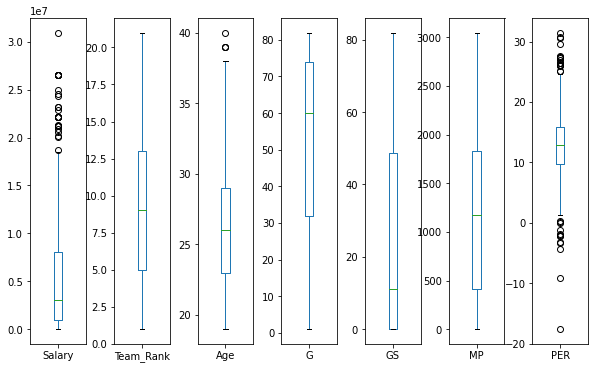

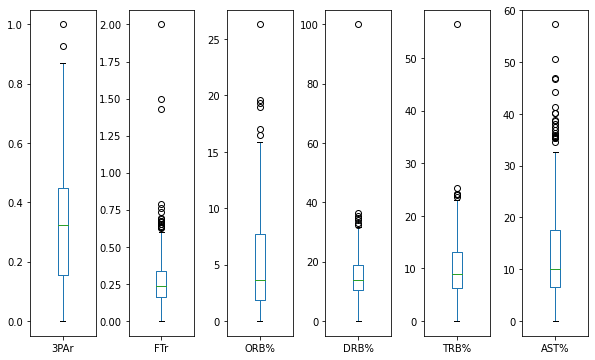

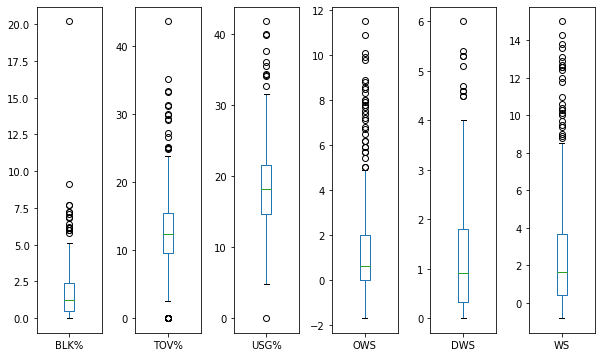

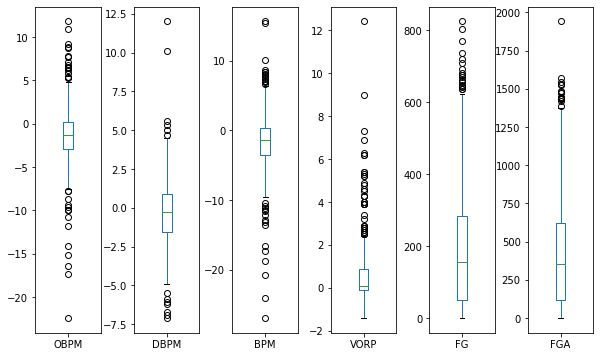

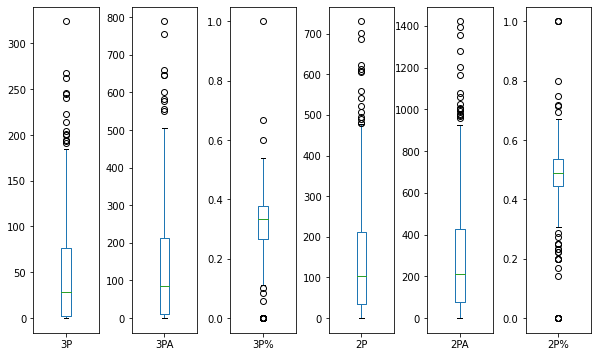

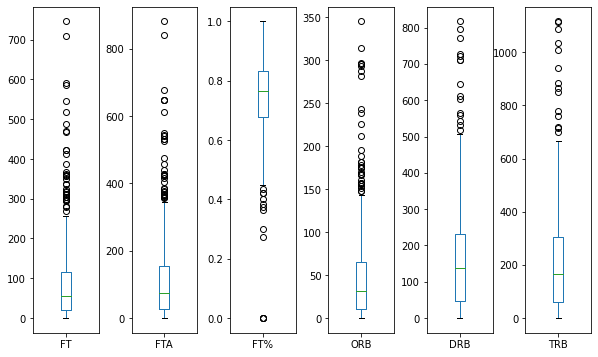

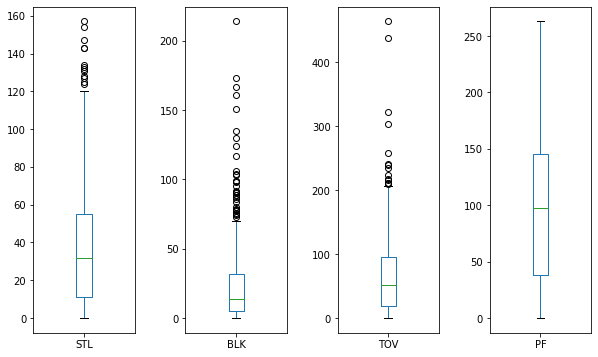

In [21]:
#Now we visualize the data dispersion by heaps, otherwise it will be overlaping 
plot_stats(0, 10)
plot_stats(11, 17)
plot_stats(18, 24)
plot_stats(25, 31)
plot_stats(32, 38)
plot_stats(39, 45)
plot_stats(46, 50)

* We can see from the above boxplots that many features have outliers, we will handle those later.
* The data scales are in four different magnitude orders

### 1.3. Relationship analysis

Due to the dimensions of the data set I only show a portion of the correlation matrix

<AxesSubplot:>

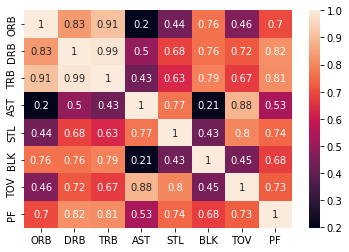

In [22]:
correlation_data = data_1.iloc[:,42:50].corr()             #it returns the correlation coefficients between features
##Visualizing the correlation coefficient values 
sns.heatmap(correlation_data, annot =True)

In [23]:
mask = np.zeros_like(correlation_data, dtype=bool) #array of zeros with the same shape and type as correlation_data
mask[np.triu_indices_from(mask)] = True            #overrides the data type
correlation_data[mask] = np.nan 

#Loking for some correlated variables, i.e. correlation values greater than 0.75 
abs(correlation_data[(correlation_data > 0.75)])

,ORB,DRB,TRB,AST,STL,BLK,TOV,PF
ORB,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DRB,0.833526,NaN,NaN,NaN,NaN,NaN,NaN,NaN
TRB,0.911153,0.987129,NaN,NaN,NaN,NaN,NaN,NaN
AST,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
STL,NaN,NaN,NaN,0.765300,NaN,NaN,NaN,NaN
BLK,0.761931,0.761782,0.788730,NaN,NaN,NaN,NaN,NaN
TOV,NaN,NaN,NaN,0.884522,0.796597,NaN,NaN,NaN
PF,NaN,0.815871,0.810287,NaN,NaN,NaN,NaN,NaN


We can see that TRB has high correlation with DRB, to see that with more detail we can visualize the correlation coefficients of TBR with all other features (including itself). It is showw below

<AxesSubplot:>

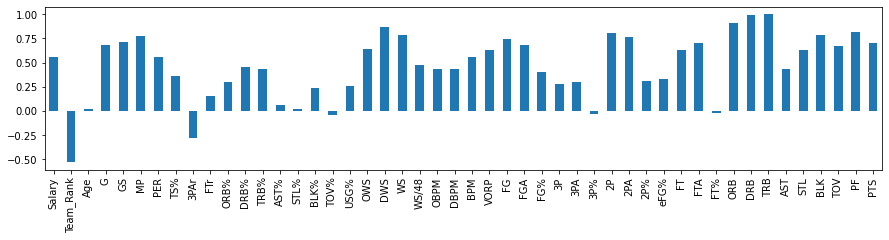

In [24]:
#TRB correlation coefficients
data_1.corr()["TRB"].plot.bar(width = 0.5, figsize=(15,3))

Running a search per segments of the correlation matrix we can find some features that are correlated (>0.75), this means that we can reduce the data set dimensions. \
The dependence is supported also by the data dictionary, it shows the mathematical relations between some variables. \
I think that there are two methods two follow:
1. Drop columns that are rates of other columns and performs PCA
2. Perform PCA with all of the column, but in this case maybe I will require more computation resources from my local PC. I will perform this step, because I am not sure about the first one
________________________

__Some distributions__

But before PCA, looking into some distributions

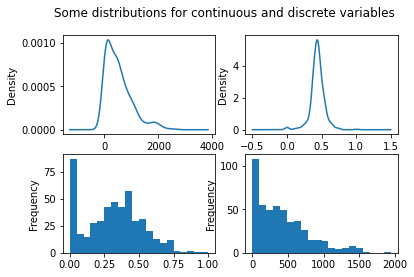

In [25]:
fig = plt.figure()
fig.suptitle('Some distributions for continuous and discrete variables')
plt.subplot(2, 2, 1)
data_1['PTS'].plot(kind='kde') 
plt.subplot(2, 2, 2)
data_1['FG%'].plot(kind='kde')
plt.subplot(2, 2, 3)
data_1['3PAr'].dropna().plot(kind='hist', bins=20)
plt.subplot(2, 2, 4)
data_1['FGA'].dropna().plot(kind='hist', bins=20)
plt.show()

The above distributions show the presence of outliers, skewed distributions, and one of them seems more symmetrical

__Normalization and Standardization__

Even when it is not necessary perform both normalization and standardization, I will perform Normalization to practice and standardization to prepare data that will be use by PCA

Normalization

In [26]:
scaler = MinMaxScaler()        #instantiating the scaler
cols=[ 'Team_Rank','Age', 'G', 'GS', 'MP', 'PER', 'TS%', '3PAr', 'FTr', 'ORB%', 'DRB%', 'TRB%', 'AST%', 'STL%',
       'BLK%', 'TOV%', 'USG%', 'OWS', 'DWS', 'WS', 'WS/48', 'OBPM', 'DBPM', 'BPM', 'VORP', 'FG', 
       'FGA', 'FG%', '3P', '3PA', '3P%', '2P', '2PA', '2P%', 'eFG%', 'FT', 'FTA', 'FT%', 'ORB', 'DRB',
       'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS']
# Fitting data and then transforming them
b=pd.DataFrame(scaler.fit_transform(data_1.drop(['Salary',"Player", "Pos", "Tm"], axis=1)), columns =cols)
                               #dropping Salary and Year, because I am supposing that Salary will be the variable to analyze
                               #I want to be able to see the year
b.head(3)

,Team_Rank,Age,G,GS,MP,PER,TS%,3PAr,FTr,ORB%,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,0.0,0.619048,0.901235,0.902439,0.916639,0.908350,0.774718,0.254,0.1975,0.152091,...,0.674,0.281159,0.664627,0.573477,0.713024,0.585987,0.205607,0.653017,0.509506,0.763878
1,0.0,0.523810,0.827160,0.829268,0.719396,0.718941,0.692115,0.302,0.0845,0.186312,...,0.800,0.275362,0.451652,0.415771,0.371965,0.331210,0.406542,0.250000,0.524715,0.372166
2,0.0,0.428571,0.753086,0.756098,0.679029,0.920570,0.814768,0.304,0.1870,0.083650,...,0.875,0.113043,0.580171,0.459677,0.331126,0.420382,0.462617,0.297414,0.444867,0.607897


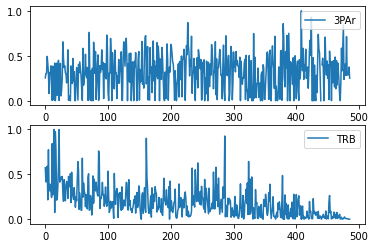

In [27]:
#Visualizing the new scale for two features
fig, (ax1, ax2) = plt.subplots(2, 1, sharey=True)
ax1.plot(b["3PAr"], label ='3PAr') #
ax1.legend(loc="upper right")
ax2.plot(b["TRB"], label ='TRB')
ax2.legend(loc="upper right")

Standardization

***************************   __data_2__ standardized data  ***************************

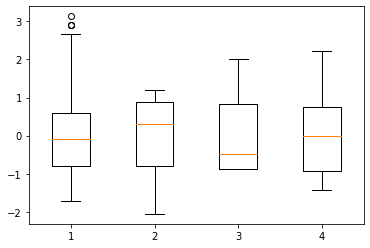

In [28]:
scaler = StandardScaler()       # Instantiating the scaler
data_2 = pd.DataFrame(scaler.fit_transform(data_1.drop(['Salary',"Player", "Pos", "Tm"], axis=1)), columns =cols)
#b = pd.DataFrame(scaler.fit_transform(data_3), columns =cols)

#visualizing some of the new distribution
plt.boxplot(data_2.iloc[:, 1:5]) 
plt.show()

Now filling some NaN using the median value because most of our features have skewed distributions and removing some outliers

***************************   **data_3_(1,2)** after handling missing and outliers values ***************************

In [29]:
#filling NaN
dtemp= data_2.fillna(data_2.median())          #using the median value of each column to impute missing values
data_3_1= dtemp                                #data with outliers
#removing outliers 
dtemp= dtemp[(np.abs(stats.zscore(dtemp)) < 2).all(axis=1)] #using zscore < 2 thus for each column
data_3_2= dtemp                   #data without outliers

In [30]:
#Since our data are already standardized I am going to filter them using 2 times sigma and evaluate how many data we will lose
print('Before dropping outliers we have {} records'.format(data_3_1.shape[0]))
print('After dropping outliers we have {} records'.format(data_3_2.shape[0]))

Before dropping outliers we have 486 records
After dropping outliers we have 264 records


Relationship of data with outliers


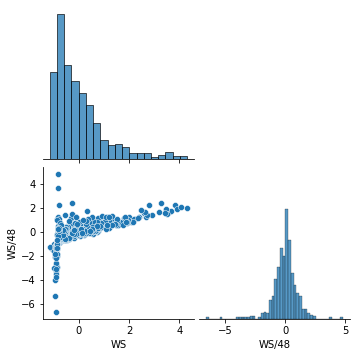

In [31]:
#visualizing the correlation between two columns
sns.pairplot(data_3_1.iloc[:, 19:21], corner=True)   #it shows in a grid the correlations between numerical features
print("Relationship of data with outliers")

Relationship of data without outliers


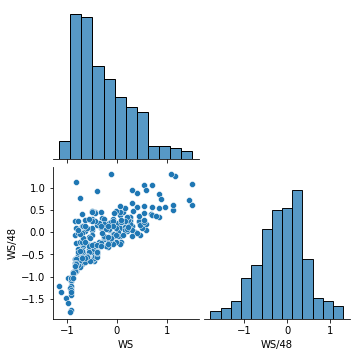

In [32]:
sns.pairplot(data_3_2.iloc[:, 19:21], corner=True) 
print("Relationship of data without outliers")         #it shows in a grid the correlations between numerical features

The last grid shows relationship between some of the numerical atributes. For instance, the relationship between WS/48% and WS  is more evident compared with the one for WS and USG%. Also, still there are outliers
____________________________________________

## 2. PCA 
We are going to suppose that we want to evaluate salary 

The variables that we will use are some of the numeric ones, we will not considering "Salary" and "Player" because:
* Salary due to this is the variable that we suppose as the target variable for a further analysis (not presented in this notebook)
* Player could be considered as an ID 

Then PCA will be perform for different datasets:
1. Standardize data with outliers and only considering numerical features (taking out "Pos" and "Team")
2. Standardize data without outliers and only considering numerical features (taking out "Pos" and "Team")
3. Standardize data with outliers and dummies for "Pos" and "Team"
***************************   __data_4__ numeric varaibles to perform PCA  ***************************

In [33]:
cols_PCA=['Team_Rank','Age', 'G', 'GS', 'MP', 'PER', 'TS%', '3PAr', 'FTr', 'ORB%', 'DRB%', 'TRB%', 'AST%', 'STL%',
       'BLK%', 'TOV%', 'USG%', 'OWS', 'DWS', 'WS', 'WS/48', 'OBPM', 'DBPM', 'BPM', 'VORP', 'FG', 
       'FGA', 'FG%', '3P', '3PA', '3P%', '2P', '2PA', '2P%', 'eFG%', 'FT', 'FTA', 'FT%', 'ORB', 'DRB',
       'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS']
data_4_1 =data_3_1[cols_PCA]             #data with outliers 
data_4_2 =data_3_2[cols_PCA]             #data without outliers 

In [34]:
#!pip install pca                   #installing pca

In [35]:
from pca import pca

I am going to perform PCA algorithm for datasets after filling missing values with and without outliers to check if there are differences between PCs. In both cases I will consider only the numerical variables. \
After that I am going to perform PCA algorithm for dataset with imputed missing values, without outliers, and adding dummy variables for Team and Pos

### 2.1 PCA for data with outliers 

In [36]:
pca_1 = pca(n_components = None)    #instantiating the pca / using all variables in the data set will be analize
results =pca_1.fit_transform(data_4_1)
results

[pca] >n_components is set to 46
[pca] >Processing dataframe..
[pca] >The PCA reduction is performed on the [47] columns of the input dataframe.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Compute explained variance.
[pca] >Outlier detection using Hotelling T2 test with alpha=[0.05] and n_components=[46]
[pca] >Outlier detection using SPE/DmodX with n_std=[2]


{'loadings':          Team_Rank           Age             G            GS            MP  \
 PC1  -1.385333e-01  1.233487e-02  1.655278e-01  1.781451e-01  2.001811e-01   
 PC2   3.034933e-02 -3.410021e-02 -3.711769e-02 -4.032456e-02 -7.860238e-02   
 PC3   5.075866e-02  6.371903e-02 -3.036932e-02 -9.391322e-02 -5.773616e-02   
 PC4   8.556264e-02 -2.924523e-02 -2.846228e-01 -8.645450e-02 -1.703580e-01   
 PC5   1.160845e-02  1.047212e-01  1.256916e-01  2.305573e-02  6.319562e-02   
 PC6   8.281960e-02 -2.243710e-01  1.853118e-01  5.548561e-02  1.110735e-01   
 PC7  -2.760897e-01  6.572342e-01  1.237812e-02 -1.554438e-02 -4.487364e-03   
 PC8   1.220081e-01 -3.803174e-01 -1.018175e-02 -2.542515e-02 -4.211103e-03   
 PC9  -3.839446e-01  2.197992e-01  7.336181e-02 -6.520247e-02  7.046923e-04   
 PC10  1.310161e-02  1.994759e-01 -1.085805e-01  2.974345e-02 -3.915656e-02   
 PC11  6.873230e-02 -2.568900e-02  4.922491e-02 -2.448659e-02  1.966252e-02   
 PC12 -3.176502e-01  8.993104e-02  5.391

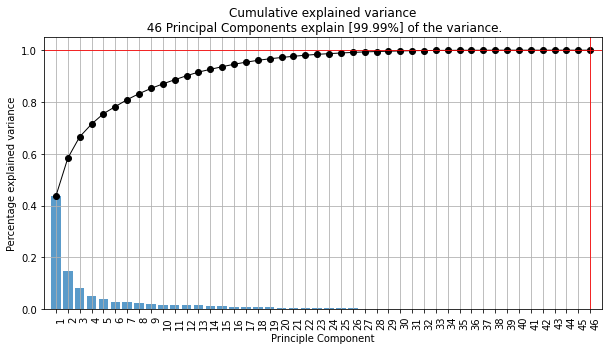

(<Figure size 720x360 with 1 Axes>,
 <AxesSubplot:title={'center':'Cumulative explained variance\n 46 Principal Components explain [99.99%] of the variance.'}, xlabel='Principle Component', ylabel='Percentage explained variance'>)

<Figure size 432x288 with 0 Axes>

In [37]:
pca_1.plot(figsize=(10,5))                  #plot the explained variance ratios

In [51]:
#acumulated explained variance
#pca_1.results['explained_var']
#looking for how many PCs are needed to achive to explained v_p % of variance
v_percentage=0.9
n_pc = len(pca_1.results['explained_var'][pca_1.results['explained_var'] <  v_percentage])
print('{} PCs are necessary to explain {}% of variance'. format(n_pc, v_percentage*100))

11 PCs are necessary to explain 90.0% of variance


[pca] >Plot PC1 vs PC2 with loadings.


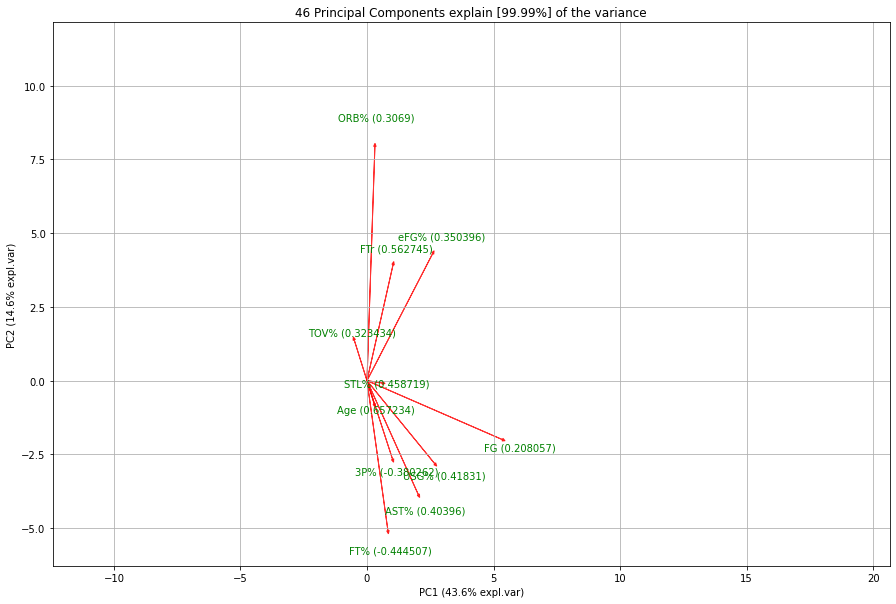

(<Figure size 1080x720 with 1 Axes>,
 <AxesSubplot:title={'center':'46 Principal Components explain [99.99%] of the variance'}, xlabel='PC1 (43.6% expl.var)', ylabel='PC2 (14.6% expl.var)'>)

In [39]:
#Plotting  the first two components
ax =pca_1.biplot(n_feat = 11, legend = False, label =False, cmap = None) 
ax

### 2.2 PCA for data without outliers 

In [40]:
pca_2 = pca(n_components = None)    #instantiating the pca /all variables in the data set will be analize
results =pca_2.fit_transform(data_4_2)
results

[pca] >n_components is set to 46
[pca] >Processing dataframe..
[pca] >The PCA reduction is performed on the [47] columns of the input dataframe.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Compute explained variance.
[pca] >Outlier detection using Hotelling T2 test with alpha=[0.05] and n_components=[46]
[pca] >Outlier detection using SPE/DmodX with n_std=[2]


{'loadings':       Team_Rank           Age             G            GS            MP  \
 PC1   -0.160131  4.180986e-02  2.474573e-01  1.967449e-01  2.727623e-01   
 PC2    0.035588 -1.416899e-02 -3.954991e-02 -3.600768e-02 -7.750896e-02   
 PC3   -0.056611 -1.414905e-01  5.132587e-02  9.428896e-02  4.457200e-02   
 PC4   -0.055438  6.122629e-02  2.069153e-01  5.323342e-02  8.510953e-02   
 PC5   -0.076221  4.632089e-01 -3.451627e-02 -2.364970e-02 -3.413216e-02   
 PC6   -0.599797  6.212250e-01 -5.889098e-02  6.637184e-03 -2.930014e-02   
 PC7   -0.106878 -1.377584e-01 -3.035606e-01 -1.295220e-02 -1.202256e-01   
 PC8   -0.092463  5.554754e-02 -1.314636e-01  3.165390e-01  5.668310e-02   
 PC9    0.539699  4.012342e-01  2.092335e-01 -4.117930e-01  1.546370e-02   
 PC10   0.342413  2.817440e-01 -2.119553e-01  2.602871e-01  1.482164e-02   
 PC11   0.242034  5.261301e-02 -2.705199e-01  5.785440e-01  3.709937e-02   
 PC12   0.015705  2.107115e-01 -8.295549e-02 -6.354685e-02 -6.249863e-03   


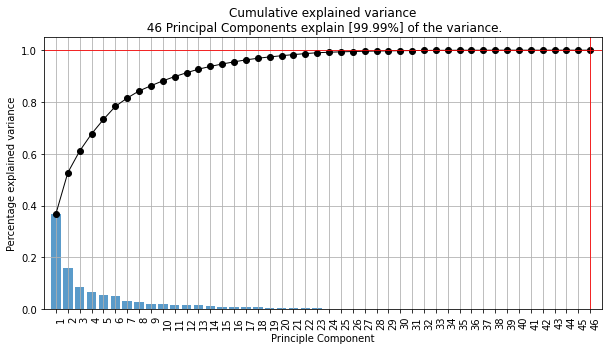

(<Figure size 720x360 with 1 Axes>,
 <AxesSubplot:title={'center':'Cumulative explained variance\n 46 Principal Components explain [99.99%] of the variance.'}, xlabel='Principle Component', ylabel='Percentage explained variance'>)

<Figure size 432x288 with 0 Axes>

In [41]:
pca_2.plot(figsize=(10,5))  

In [50]:
#looking for how many PCs are needed to achive to explained v_p % of variance
v_percentage=0.9
n_pc = len(pca_2.results['explained_var'][pca_2.results['explained_var'] <  v_percentage])
print('{} PCs are necessary to explain {}% of variance'. format(n_pc, v_percentage*100))

11 PCs are necessary to explain 90.0% of variance


[pca] >Plot PC1 vs PC2 with loadings.


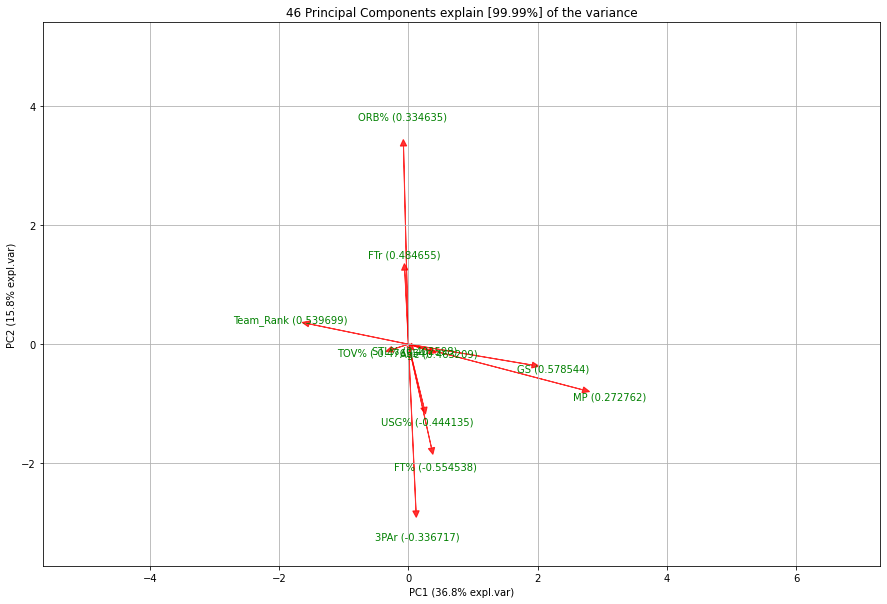

(<Figure size 1080x720 with 1 Axes>,
 <AxesSubplot:title={'center':'46 Principal Components explain [99.99%] of the variance'}, xlabel='PC1 (36.8% expl.var)', ylabel='PC2 (15.8% expl.var)'>)

In [43]:
#Plotting  the first two components
ax =pca_2.biplot(n_feat = 11, legend = False, label =False, cmap = None) 
ax

Conclusion from the PCA for the two datasets \
1 For both data sets, with and without outliers, the number of PCs to explain 90% of variance is the same \
2 Then, I considere as a best analysis the first one (with outliers) due to the second dataset have ~50% of the data for 2017 
___________________

### 2.3 PCA for data with dummy variables 

In [44]:
#Creating dummies 
t_1 = pd.get_dummies(data_1["Pos"], prefix = "Pos", drop_first=True)#dummies for Pos
t_2 = pd.get_dummies(data_1["Tm"], prefix = "Tm", drop_first=True)  #dummies for Tm
t_3 = t_1.join(t_2)                                                 
columns_d = ['Pos_PF', 'Pos_PG', 'Pos_SF', 'Pos_SG', 'Tm_BOS', 'Tm_BRK', 'Tm_CHI', 'Tm_CHO', 'Tm_CLE', 'Tm_DAL', 'Tm_DEN',
       'Tm_DET', 'Tm_GSW', 'Tm_HOU', 'Tm_IND', 'Tm_LAC', 'Tm_LAL', 'Tm_MEM',
       'Tm_MIA', 'Tm_MIL', 'Tm_MIN', 'Tm_NOP', 'Tm_NYK', 'Tm_OKC', 'Tm_ORL',
       'Tm_PHI', 'Tm_PHO', 'Tm_POR', 'Tm_SAC', 'Tm_SAS', 'Tm_TOR', 'Tm_UTA',
       'Tm_WAS']
#print(len(columns_d))
t_3 =pd.DataFrame(scaler.fit_transform(t_3), columns = columns_d) #standardizing dummy variables

#joining the dataset with only numerical variables and the one with dummy varaibles
data_5 = data_3_1.join(t_3)         

In [45]:
pca_3 = pca(n_components = None)    #instantiating the pca /all variables in the data set will be analize
results =pca_3.fit_transform(data_5)
results

[pca] >n_components is set to 79
[pca] >Processing dataframe..
[pca] >The PCA reduction is performed on the [80] columns of the input dataframe.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Compute explained variance.
[pca] >Outlier detection using Hotelling T2 test with alpha=[0.05] and n_components=[79]
[pca] >Outlier detection using SPE/DmodX with n_std=[2]


{'loadings':          Team_Rank           Age             G            GS            MP  \
 PC1  -1.383929e-01  1.246070e-02  1.653534e-01  1.777124e-01  1.997192e-01   
 PC2   2.580202e-02 -3.249467e-02 -3.505987e-02 -3.821226e-02 -7.572191e-02   
 PC3   5.739379e-02  6.111750e-02 -3.968640e-02 -9.551187e-02 -6.526610e-02   
 PC4   7.098123e-02 -9.355998e-03 -1.985210e-01 -6.104987e-02 -1.279753e-01   
 PC5  -6.789622e-03  1.350543e-01  1.656637e-01  3.414910e-02  8.068596e-02   
 ...            ...           ...           ...           ...           ...   
 PC75 -5.592747e-04  5.211356e-06  8.647671e-04  8.653329e-04 -2.025749e-04   
 PC76 -1.841855e-04  1.873754e-04 -2.768154e-03  1.707668e-04  3.557561e-03   
 PC77  4.241887e-16 -2.454368e-17 -6.063041e-16 -1.572330e-16  6.066489e-16   
 PC78 -0.000000e+00  6.516289e-17  1.582248e-16 -4.412233e-16  5.354765e-16   
 PC79 -0.000000e+00 -7.185613e-17 -1.713608e-16 -3.601819e-16  4.917599e-16   
 
                PER           TS%     

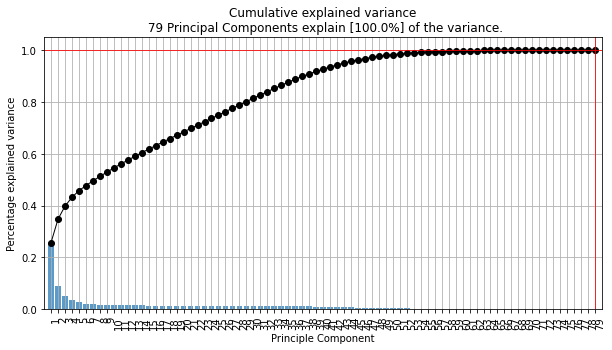

(<Figure size 720x360 with 1 Axes>,
 <AxesSubplot:title={'center':'Cumulative explained variance\n 79 Principal Components explain [100.0%] of the variance.'}, xlabel='Principle Component', ylabel='Percentage explained variance'>)

<Figure size 432x288 with 0 Axes>

In [46]:
pca_3.plot(figsize=(10,5))  

In [53]:
#looking for how many PCs are needed to achive to explained v_p % of variance
v_percentage=0.9
n_pc = len(pca_3.results['explained_var'][pca_3.results['explained_var'] <  v_percentage])
print('{} PCs are necessary to explain {}% of variance'. format(n_pc, v_percentage*100))

37 PCs are necessary to explain 90.0% of variance


[pca] >Plot PC1 vs PC2 with loadings.


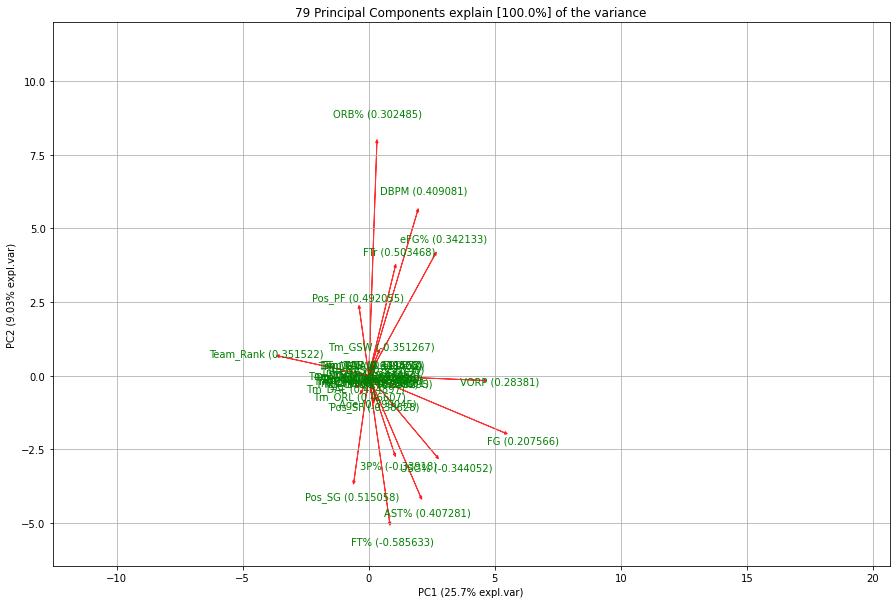

(<Figure size 1080x720 with 1 Axes>,
 <AxesSubplot:title={'center':'79 Principal Components explain [100.0%] of the variance'}, xlabel='PC1 (25.7% expl.var)', ylabel='PC2 (9.03% expl.var)'>)

In [48]:
#Plotting  the first two components
ax =pca_3.biplot(n_feat = 37, legend = False, label =False, cmap = None) 
ax

Conclusions about performing PCA using dummy variables. \
Using dummy variables increase the dataset dimensions, the more dimensions, the more dispersion. Then it could explain a greater number of PCs to describe the 90% of variance.

### Conclusions

EDA was presented, over a data set that combines two files related to NBA players. Some columns and rows were droped because they do not contribute to the proposed analysis\
First EDA was perform. Finding from the relationship analysis, that some variables were highly correlated each other, also it was supported by the dictionary appended to this work.\
Because the number of features and the existance of relationship I considered that PCA would redude the number of dimensions for further analysis.\
PCA was performed for three data sets with imputed missing values:
1. with outliers and only numerical features
2. without outliers and only numerical features
3. with outliers and only numerical features and adding dummy variables for two categorical features

Future work proposals:
* Perform an analysis by player over time.
* Consider to eliminate some columns that are rates of other column.
* Perform PCA without creating dummy variables for "Tm" because it introduce many more dimensions.